# DETECTOR D'OPINIONS

In [ ]:
%pip install scikit-learn nltk
%pip install seaborn

## Imports

In [5]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from string import punctuation
from nltk.wsd import lesk
from nltk.corpus import sentiwordnet as swn
import numpy as np

## Descargues

In [6]:
# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Supervisat (Pràctica 2.a)

### Preprocessament

Per a poder entrenar el model correctament hem realitzat el següent preprocessament, primer hem tret les 'stop words' excepte les paraules 'not, no, never', ja que creiem que aquestes poden tenir importància per a detectar si l'opinió és positiva o negativa. Seguidament hem eliminat els signes de puntuació. Finalment, hem separat les opinions i les seves categories que indiquen si són positives o negatives.

In [7]:
# Obtener lista de palabras vacías y definir signos de puntuación
stop_words = set(nltk.corpus.stopwords.words('english'))
punctuations = set(punctuation)

# Agregar palabras que deseas mantener a la lista de palabras vacías
words_to_keep = ["not", "no", "never"]  # Agrega aquí las palabras que deseas mantener
stop_words = stop_words.difference(set(words_to_keep))

# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenizar el texto y eliminar signos de puntuación
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in punctuations]
    # Eliminar palabras vacías
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Obtener críticas y etiquetas
documents = [(preprocess_text(movie_reviews.raw(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
reviews = [opinion[0] for opinion in documents]
labels = [opinion[1] for opinion in documents]


A continuació, inicialitzem el vectoritzador amb un valor de 'min_df' igual a 15 ja que..... Aquest paràmetre és crucial per representar les nostres dades amb eficàcia. Posteriorment, procedim a dividir el conjunt de dades en conjunts de entrenament i de prova. El 'min_df' ens ajuda a donar prioritat a les paraules que apareixen amb una freqüència significativa en diferents documents. En altres paraules, considera la presència d'una paraula en múltiples documents, en lloc de simplement comptar quantes vegades apareix en un sol document. Això ens permet obtenir una representació més robusta dels nostres textos.

In [8]:
# Inicializa el CountVectorizer
vectorizer = CountVectorizer(min_df=15) # per comentar

# Transforma las críticas preprocesadas en vectores de características
X = vectorizer.fit_transform(reviews)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [13]:
nb_param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}  # Más valores de alpha a probar
nb_grid_search = GridSearchCV(MultinomialNB(), nb_param_grid, cv=5)
nb_grid_search.fit(X_train, y_train)
print("Mejores parámetros para Naive Bayes:", nb_grid_search.best_params_)


Mejores parámetros para Naive Bayes: {'alpha': 5.0}


In [14]:
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(SVC(kernel='linear'), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
print("Mejores parámetros para SVM:", svm_grid_search.best_params_)


Mejores parámetros para SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [23]:
logistic_param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}  
logistic_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), logistic_param_grid, cv=5)
logistic_grid_search.fit(X_train, y_train)
print("Mejores parámetros para Regresión Logística:", logistic_grid_search.best_params_)

Mejores parámetros para Regresión Logística: {'C': 0.1, 'solver': 'newton-cg'}


In [16]:
tree_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
tree_grid_search = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, cv=5)
tree_grid_search.fit(X_train, y_train)
print("Mejores parámetros para Árbol de Decisión:", tree_grid_search.best_params_)


Mejores parámetros para Árbol de Decisión: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


A continuació, hem seleccionat quatre models supervisats diferents per a comparar-los i determinar quin generalitza millor per obtenir resultats òptims. Els models supervisats escollits són els següents:

1. Multinomial Naive Bayes (MultinomialNB)
2. Màquines de Vector Suport (SVM)
3. Regressió Logística (Logistic Regression)
4. Arbres de Decisió (Decision Tree)

In [36]:
# Inicialitza el classificador MultinomialNB
nb_model = MultinomialNB(alpha=5.0)
nb_model.fit(X_train, y_train)

#Inicialitza el classificador svm
svm_model = SVC(C=10, gamma='auto', kernel='rbf')
svm_model.fit(X_train, y_train)

#Inicialitza el classificador logistic regression
logistic_model = LogisticRegression(max_iter=1000,  C=0.1, solver='newton-cg')
logistic_model.fit(X_train, y_train)

#Inicialitza el classificador
decision_tree_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5)

Per a poder veure quins models generalitzen millor usarem el metode de 'cross validation' en aquest cas per a cada model fem 5 particions. A continuació podem observar els resultats.
Com podem veure en els resultats el model que té millor 'accuracy' és la 'Logistic Regression'.

In [37]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para Naive Bayes
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5)
print("Naive Bayes Cross-Validation Scores:", nb_cv_scores)
print("Mean Naive Bayes Cross-Validation Score:", round(nb_cv_scores.mean(), 3))
print("\n")
# Validación cruzada para SVM
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("SVM Cross-Validation Scores:", svm_cv_scores)
print("Mean SVM Cross-Validation Score:", round(svm_cv_scores.mean(), 3))
print("\n")
# Validación cruzada para Regresión Logística
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print("Mean Logistic Regression Cross-Validation Score:", round(logistic_cv_scores.mean(), 3))
print("\n")
# Validación cruzada para Árboles de Decisión
decision_tree_cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)
print("Decision Tree Cross-Validation Scores:", decision_tree_cv_scores)
print("Mean Decision Tree Cross-Validation Score:", round(decision_tree_cv_scores.mean(), 3))


Naive Bayes Cross-Validation Scores: [0.821875 0.85     0.79375  0.821875 0.7875  ]
Mean Naive Bayes Cross-Validation Score: 0.815


SVM Cross-Validation Scores: [0.815625 0.875    0.8125   0.85     0.8125  ]
Mean SVM Cross-Validation Score: 0.833


Logistic Regression Cross-Validation Scores: [0.821875 0.875    0.809375 0.840625 0.809375]
Mean Logistic Regression Cross-Validation Score: 0.831


Decision Tree Cross-Validation Scores: [0.63125 0.66875 0.6125  0.6     0.61875]
Mean Decision Tree Cross-Validation Score: 0.626


Seguidament mirem els resultats per a la partició del test i observem que el model de 'Logistic regression' també és el que obte millor 'accuracy' en la partició del 'test'.

In [38]:
import pandas as pd

# Realiza predicciones en el conjunto de prueba
y_pred_mnb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calcular accuracies
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Crear el dataframe
data = {
    'Model': ['Multinomial Naive Bayes', 'SVM', 'Regresió Logistica', 'Arbre de Decisió'],
    'Accuracy': [accuracy_mnb, accuracy_svm, accuracy_logistic, accuracy_decision_tree]
}

taula_accuracy = pd.DataFrame(data)

# Mostrar la tabla
print(taula_accuracy)

                     Model  Accuracy
0  Multinomial Naive Bayes    0.8200
1                      SVM    0.8250
2       Regresió Logistica    0.8225
3         Arbre de Decisió    0.6250


A continuació podem observar la matriu de confusó del model realitzat amb 'logistic regression' ja que és el model que generalitza millor. Podem observar com la majoria de valors es troben en la diagonal i que les vegades que ha predit malament les positives i les negatives són molt semblants

0.825


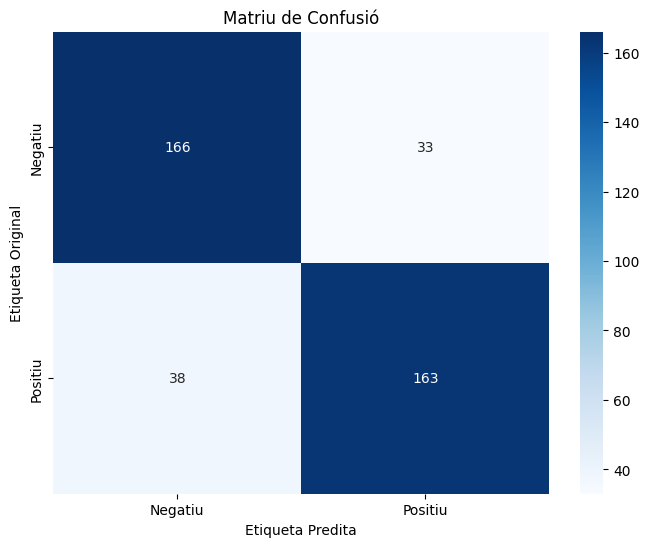

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
print(accuracy_score(y_test, y_pred_svm))

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Define las etiquetas de las clases
classes = ['Negatiu', 'Positiu']

# Crea la figura
plt.figure(figsize=(8, 6))

# Crea la matriz de confusión como un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Añade etiquetas y título
plt.xlabel('Etiqueta Predita')
plt.ylabel('Etiqueta Original')
plt.title('Matriu de Confusió')


# Muestra la matriz de confusión
plt.show()


## No supervisat (Pràctica 2.b)

A continuació fem la partició train, test amb la mateixa llavor que en els models supervisats per osbtenir la mateixa partició amb las reviews sense vectoritzar 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

### Preprocessing

In [105]:
# Función para eliminar los determinantes de una revisión
def specific_words(review):
    # Tokenizar el texto en oraciones y palabras
    sentences = sent_tokenize(review)
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    
    d = {'NN': 'n', 'NNS': 'n', 
       'JJ': 'a', 'JJR': 'a', 'JJS': 'a', 
       'VB': 'v', 'VBD': 'v', 'VBG': 'v', 'VBN': 'v', 'VBP': 'v', 'VBZ': 'v', 
       'RB': 'r', 'RBR': 'r', 'RBS': 'r'}

    # Quedarse solo con los nombres, adjetivos, adverbios y verbos
    filtered_sentences = []
    for sentence in tokenized_sentences:
        tagged_words = nltk.pos_tag(sentence)
        filtered_sentence = [(word, d[pos]) for word, pos in tagged_words if pos in d]
        filtered_sentences.append(filtered_sentence)
        
    return filtered_sentence

# Eliminar los determinantes de cada revisión
filtered_reviews = [specific_words(review) for review in X_test]

En aquest preprocessament després d'haver provat diferents combinacions(queda per fer la comprovació) ens quedem amb els noms els adjectius i els adverbis

In [117]:
def keep_specific_pos(review):
    # Tokenizar el texto en oraciones y palabras
    sentences = sent_tokenize(review)
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

    # Mantener palabras específicas por categoría gramatical
    filtered_sentences = []
    for sentence in tokenized_sentences:
        tagged_words = nltk.pos_tag(sentence)
        filtered_sentence = [word for word, pos in tagged_words if pos.startswith('N') # Sustantivos
                                                                    or  pos.startswith('JJ') # Adjetivos
                                                                    #or  pos.startswith('VB') # Verbos
                                                                    or  pos.startswith('RB') # Adverbios
                                                                    ]    
        filtered_sentences.append(filtered_sentence)

    # Reconstruir las oraciones filtradas
    filtered_review = [' '.join(sentence) for sentence in filtered_sentences]
    return ' '.join(filtered_review)

# Conservar sustantivos, adjetivos, verbos y adverbios de cada revisión
filtered_reviews2 = [keep_specific_pos(review) for review in X_test]

### Lesk

#### Prova 1

0.56


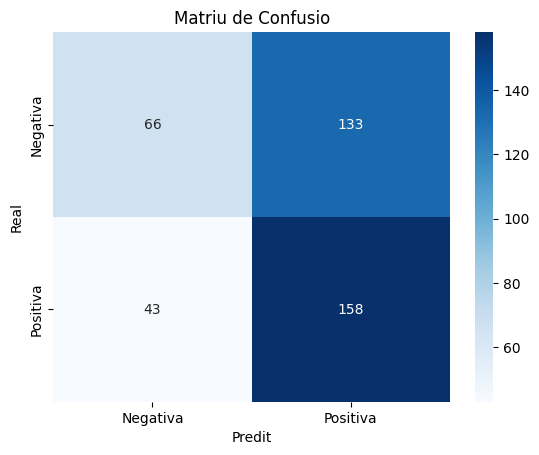

In [121]:
# Función para obtener la puntuación de polaridad de una palabra usando Lesk
def get_word_sentiment_score_with_lesk(context, word, tag):
    # Obtener el synset con Lesk
    synset = lesk(context, word,tag)
    if synset:
        # Obtener los sentimientos asociados al synset de SentiWordnet
        sent_synset = swn.senti_synset(synset.name())
        if sent_synset: 
            return sent_synset.pos_score() - sent_synset.neg_score()
    return 0

# Umbral de polaridad
threshold = 0

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Lista para almacenar las etiquetas reales y las predicciones
real_labels = []
predicted_labels = []

# Procesar cada opinión
for opinion in filtered_reviews:
    # Tokenizar la opinión
    total_sentiment_score = 0.0
    word_count = 0
    for i, token in enumerate(opinion):
        # Obtener el contexto de la palabra (palabras circundantes)
        context = opinion[max(0, i-5):i] + opinion[i+1:min(len(opinion), i+6)]
        # Calcular la puntuación de polaridad de la palabra
        sentiment_score = get_word_sentiment_score_with_lesk(context, token[0], token[1])
        total_sentiment_score += sentiment_score
        word_count += 1
    # Calcular la puntuación de polaridad promedio para la opinión
    if word_count > 0:
        average_sentiment_score = total_sentiment_score / word_count
        # Determinar si la opinión es positiva, negativa o neutra
        if average_sentiment_score >= threshold:
            predicted_labels.append("pos")
        elif average_sentiment_score < threshold:
            predicted_labels.append("neg")


# Calcular la matriz de confusión
print(accuracy_score(y_test, predicted_labels))
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predit")
plt.ylabel("Real")
plt.title("Matriu de Confusio")
plt.show()

#### Prova 2

Per determinar si una opinió és positiva o negativa, utilitzem el context de les paraules, que ens proporcionen una puntuació segons el 'SentiWordNet'. Si una paraula no està present en el 'SentiWordNet', assignem una puntuació de 0, ja que no podem determinar si és positiva o negativa i, per tant, la considerem neutra en el context. Després d'obtenir les puntuacions de les paraules, les sumem. Si la suma és superior a 0, la opinió es considera positiva; si és inferior a 0, es considera negativa.

0.625


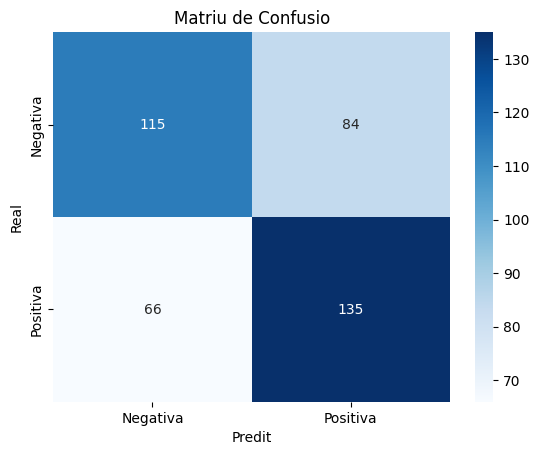

In [120]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from nltk.corpus import sentiwordnet as swn
import numpy as np

# Función para obtener la puntuación de polaridad de una palabra usando Lesk
def get_word_sentiment_score_with_lesk(word, context):
    # Obtener el synset con Lesk
    synset = lesk(context, word)
    if synset:
        # Obtener los sentimientos asociados al synset de SentiWordnet
        sent_synset = swn.senti_synset(synset.name())
        if sent_synset: 
            return sent_synset.pos_score() - sent_synset.neg_score()
    return 0

# Umbral de polaridad
threshold = 0

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Lista para almacenar las etiquetas reales y las predicciones
real_labels = []
predicted_labels = []

# Procesar cada opinión
for opinion in filtered_reviews2:
    # Tokenizar la opinión
    tokens = word_tokenize(opinion)
    total_sentiment_score = 0
    word_count = 0
    for i, token in enumerate(tokens):
        # Obtener el contexto de la palabra (palabras circundantes)
        context = tokens[max(0, i-5):i] + tokens[i+1:min(len(tokens), i+6)]
        # Calcular la puntuación de polaridad de la palabra
        sentiment_score = get_word_sentiment_score_with_lesk(token, context)
        total_sentiment_score += sentiment_score
        word_count += 1
    # Calcular la puntuación de polaridad promedio para la opinión
    if word_count > 0:
        average_sentiment_score = total_sentiment_score / word_count
        # Determinar si la opinión es positiva, negativa o neutra
        if average_sentiment_score >= threshold:
            predicted_labels.append("pos")
        elif average_sentiment_score < threshold:
            predicted_labels.append("neg")



A continuació, podem observar com la majoria dels valors es concentren a la diagonal principal, indicant prediccions correctes. No obstant això, es pot notar que fora de la diagonal hi ha valors notablement alts, especialment amb molts casos de negatives predites com a positives. Això suggereix la necessitat de millorar la capacitat del model per a identificar correctament les opinions negatives.

In [ ]:
# Calcular la matriz de confusión
print(accuracy_score(y_test, predicted_labels))
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predit")
plt.ylabel("Real")
plt.title("Matriu de Confusio")
plt.show()

### TextServer

A continuació, vam intentar utilitzar el servidor de text, però ens va retornar errors degut a un gran nombre d'entrades. Com a alternativa, vam optar per utilitzar el model amb l'algoritme LESK, com vam explicar anteriorment.

In [71]:
import requests
import pandas as pd
import json
import sys
from functools import reduce

load = lambda r: json.loads(r.encode('utf-8'))
pars = lambda r: [p for p in r['paragraphs']]
sents = lambda p: [s for s in p['sentences']]
decode = lambda x: bytes(x,'latin1').decode('utf-8')
info = lambda s, f: [f(t) for t in s['tokens']]
tokensDecode = lambda s: [decode(t['form']) for t in s['tokens']]
tokens = lambda s: [t['form'] for t in s['tokens']]
flatten = lambda l: reduce(lambda x, y: x + y, l, [])

class TextServer:
  def __init__(self, user, pwd, service='morpho'):
    self.service = service
    self.request_data = {
      'username':user,
      'password':pwd,
      'language': 'ca',
      'output': 'json',
      'interactive':'1' 
    }

  def query(self, text):
    url = "http://frodo.lsi.upc.edu:8080/TextWS/textservlet/ws/processQuery/"+self.service
    self.request_data['text_input'] = text
    resp = requests.post(url, files=self.request_data)
    if resp.status_code != requests.codes.ok : 
      resp.raise_for_status()
    return resp.text

  def tokenizer(self, text):
    self.service = 'tokenizer'
    ctnt = self.query(text)
    return list(map(tokens, sents(pars(load(ctnt))[0])))

  def morpho(self, text, pandas=False):
    def cols(t):
      return [t['form'],t['lemma'],t['tag'],t['pos']]
      
    self.service = 'morpho'
    ctnt = self.query(text)
    if pandas:
      dt = list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))
      return pd.DataFrame(flatten(dt), columns=['forma', 'lema', 'tag', 'pos'])
    else:
      return list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))

  def senses(self, text, pandas=False):
    def cols(t):
      l = [t['form'],t['lemma'],t['tag'],t['pos']]
      l += [t['wn']] if 'wn' in t else ['N/A']
      return l
        
    self.service = 'senses'
    ctnt = self.query(text)
    if pandas:
      dt = list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))
      return pd.DataFrame(flatten(dt), columns=['forma', 'lema', 'tag', 'pos', 'synset'])
    else:
      return list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))

  def entities(self, text, pandas=False):
    def cols(t):
      l = [t['form'],t['lemma'],t['tag'],t['pos']]
      l += [t['wn']] if 'wn' in t else ['N/A']
      l += [t['neclass']] if 'neclass' in t else ['N/A']
      return l
        
    self.service = 'entities'
    ctnt = self.query(text)
    if pandas:
      dt = list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))
      return pd.DataFrame(flatten(dt), columns=['forma', 'lema', 'tag', 'pos', 'synset', 'neclass'])
    else:
      return list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))

  def dependencies(self, text, pandas=False):
    def filtre(d): 
      res = {}
      for k in d:
        if k != 'token':
          if k!='children':
            res[k] = d[k]
          else:
            res[k] = list(map(filtre,d[k]))
      return res
        
    self.service = 'dependencies'
    ctnt = self.query(text)
    deps = [x[0] for x in map(lambda x: x['dependencies'], sents(pars(load(ctnt))[0]))]
    return list(map(filtre, deps))

  def coreferences(self, text, pandas=False):
    self.service = 'coreferences'
    self.request_data['language'] = 'en'
    ctnt = self.query(text)
    return [[c['words'] for c in x['mentions']] for x in load(ctnt)['coreferences']]
      

A continuació utilitzarem la classe OpinionDetector per analitzar sentiments en textos mitjançant text server. Després, classifica les opinions de la mostra de prova (X_test) com a positives o negatives i avalua la seva precisió utilitzant una matriu de confusió. Aquest procés ens ajuda a entendre com el model interpreta els sentiments i com classifica les opinions en els textos.

In [1]:
class OpinionDetector:
    def __init__(self, user, pwd):
        self.text_server = TextServer(user, pwd)
    
    def get_synsets_and_sentiments(self, text):
        synsets_info = self.text_server.senses(text, pandas=False)
        results = []
        for sentence in synsets_info:
            sentence_results = []
            for token_info in sentence:
                form, lemma, tag, pos, synset = token_info
                if pos == 'noun':
                    pos = 'n'
                elif pos == 'adjective':
                    pos = 'a'
                elif pos == 'adverb':
                    pos = 'r'
                elif pos == 'verb':
                    pos = 'v'
                else:
                    continue
                
                sentiment_score = self.get_sentiment_score(lemma, pos)
                sentence_results.append((form, lemma, tag, pos, synset, sentiment_score))
                
            results.append(sentence_results)
        return results
    
    def get_sentiment_score(self, lemma, pos):
        # Obtiene el synset de WordNet usando el lema y la parte del habla
        synsets = wn.synsets(lemma, pos=pos)
        
        # Si hay varios synsets con el mismo lema y POS, puedes elegir el primero o implementar tu lógica de selección
        if synsets:
            synset = synsets[0]  # Elegir el primer synset
            senti_synset = swn.senti_synset(synset.name())
            if senti_synset:
                return senti_synset.pos_score() - senti_synset.neg_score()
        
        return 0  # O retorna un valor predeterminado si no se encuentra sentiSynset


user = "client2"
pwd = "FASTandFURIOUS333!"
user2 = 'miquel_ropero'
pwd2 = 'MIKIrop22!'
opinion_detector = OpinionDetector(user, pwd)

results = []
for review in X_test:
    document = opinion_detector.get_synsets_and_sentiments(review)
    results.append(document)

predicted_labels = []

threshold = 0
total_sentiment_score = 0.0
for sentence in results:
    word_count = 0
    for token_info in sentence:
        form, lemma, tag, pos, synset, sentiment_score = token_info
        print(f"Forma: {form}, Lemma: {lemma}, TAG: {tag}, POS: {pos}, Synset: {synset}, Sentimiento: {sentiment_score}")
        total_sentiment_score += sentiment_score
        word_count += 1
        
    average_sentiment_score = total_sentiment_score / word_count
    # Determinar si la opinión es positiva, negativa o neutra
    if average_sentiment_score >= threshold:
        predicted_labels.append("pos")
    elif average_sentiment_score < threshold:
        predicted_labels.append("neg")

# Calcular la matriz de confusión
print(accuracy_score(y_test, predicted_labels))
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predit")
plt.ylabel("Real")
plt.title("Matriu de Confusio")
plt.show()

NameError: name 'TextServer' is not defined